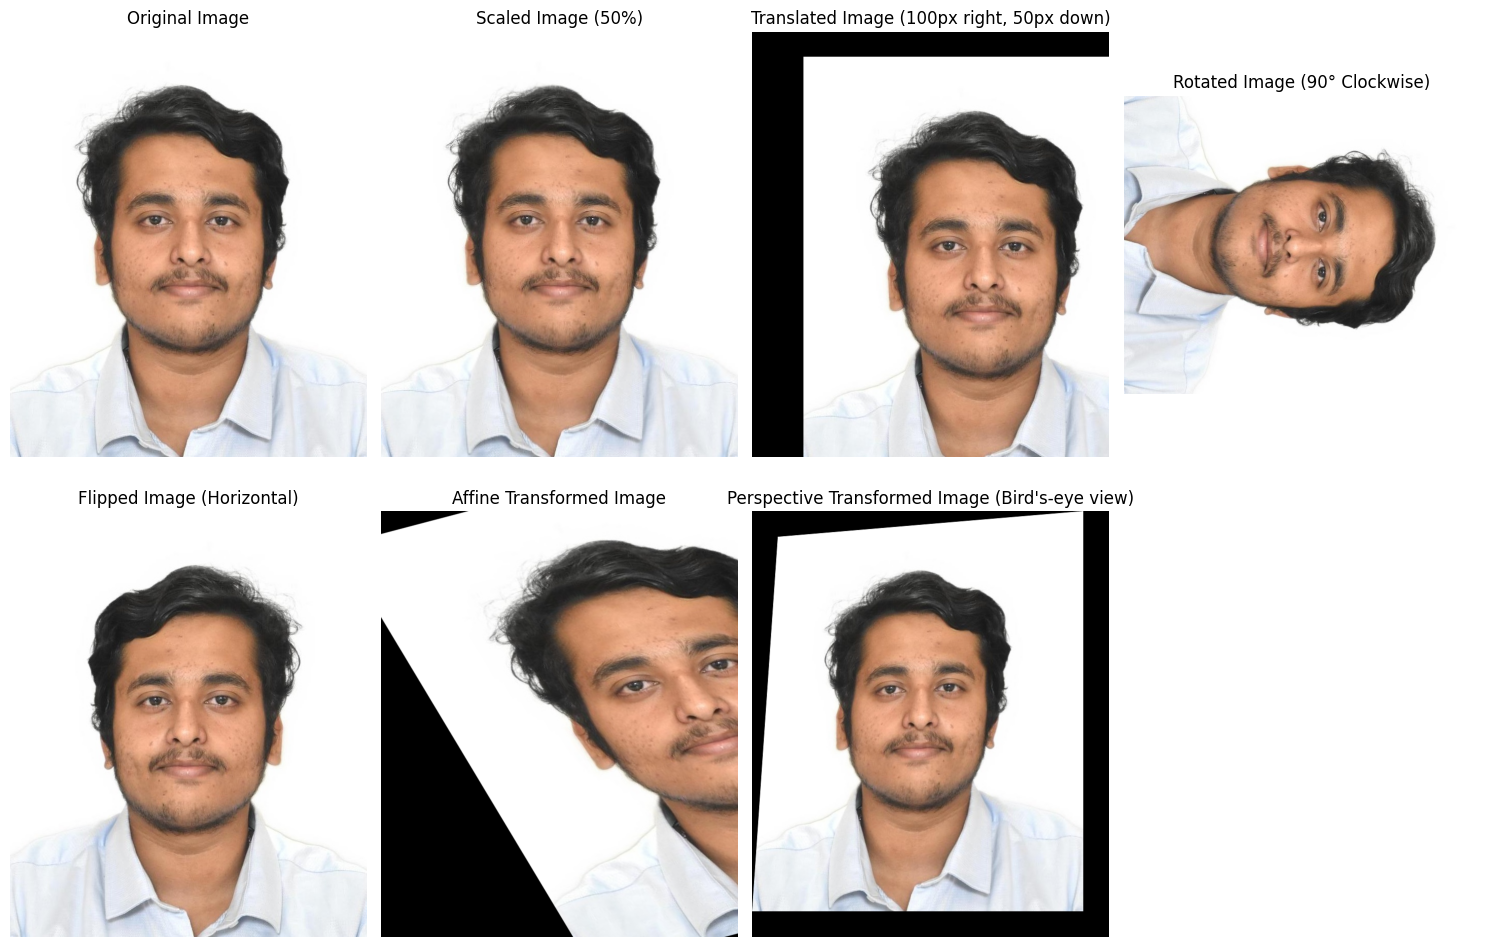

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C:/Users/Pratham.m/Downloads/pratham.jpg")  

# Get original dimensions
height, width = image.shape[:2]

# 1. Scaling: Reduce to 50% of original size
scaled_image = cv2.resize(image, (width // 2, height // 2))

# 2. Translation: Move 100 pixels to the right and 50 pixels down
translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

# 3. Rotation: Rotate 90 degrees clockwise
rotated_image_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# 4. Flipping: Flip horizontally
flipped_image = cv2.flip(image, 1)

# 5. Affine Transformation: Mapping three points
# Define source points and destination points
src_points = np.float32([[50, 50], [200, 50], [50, 200]])  # Example points
dst_points = np.float32([[10, 100], [200, 50], [100, 250]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
affine_transformed_image = cv2.warpAffine(image, affine_matrix, (width, height))

# 6. Perspective Transformation (Bird's-eye view)
# Define source and destination points for perspective transformation
src_pts_perspective = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
dst_pts_perspective = np.float32([[50, 50], [width-50, 0], [0, height-50], [width-50, height-50]])
perspective_matrix = cv2.getPerspectiveTransform(src_pts_perspective, dst_pts_perspective)
perspective_transformed_image = cv2.warpPerspective(image, perspective_matrix, (width, height))

# Function to display images inline
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# List of processed images and their titles
processed_images = [
    image,  # Original
    scaled_image,
    translated_image,
    rotated_image_90,
    flipped_image,
    affine_transformed_image,
    perspective_transformed_image  # Bird's-eye view transformation
]

titles = [
    'Original Image',
    'Scaled Image (50%)',
    'Translated Image (100px right, 50px down)',
    'Rotated Image (90° Clockwise)',
    'Flipped Image (Horizontal)',
    'Affine Transformed Image',
    'Perspective Transformed Image (Bird\'s-eye view)'
]

# Display the images
display_images(processed_images, titles)


Original Image: This is the base image before any transformations. It serves as a reference for comparison.

Scaled Image (50%): The image has been resized to 50% of its original size, reducing both the height and width. This makes the image smaller while maintaining the aspect ratio.

Translated Image (100px right, 50px down): The image has been shifted (translated) 100 pixels to the right and 50 pixels downward. This creates a black border on the left and top, indicating the empty space created by the translation.

Rotated Image (90° Clockwise): The image has been rotated 90 degrees in the clockwise direction, repositioning it to be horizontally tilted.

Flipped Image (Horizontal): The image has been flipped horizontally, creating a mirror image. The left side of the original now appears on the right, and vice versa.

Affine Transformed Image: Three points on the original image were mapped to new positions, resulting in a skewed, distorted effect. Parts of the image appear stretched or compressed, and black triangles fill areas where the image has been warped.

Perspective Transformed Image (Bird's-eye view): The image was transformed using a perspective mapping, giving the appearance of being viewed from an angle. This effect simulates depth, as if the image is seen from a higher or skewed vantage point.